# Importing Packages

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf

# Defining paths

In [ ]:
path='/content/drive/MyDrive/Explicit_Image_Detection/Datasets/Train/'

In [ ]:
Nude=os.listdir(path+'Explicit_Images/')
Decent=os.listdir(path+'Non_Explicit_Images/')
test_path='/content/drive/MyDrive/Explicit_Image_Detection/Datasets/Test/'
test=os.listdir(test_path)

# Importing Resnet50 Pretrained model

In [ ]:
resnet = tf.keras.applications.resnet50.ResNet50(include_top=False)
preprocess_input = tf.keras.applications.resnet50.preprocess_input
image = tf.keras.preprocessing.image

In [ ]:
batch_size=20

# Extracting Features

In [ ]:
def extract_features1(img_paths, batch_size = 1):

    global resnet
    img_array = np.zeros((1, 299, 299, 3))
    img=image.load_img(path1,target_size=(299,299))
    #plt.imshow(img)
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    x = preprocess_input(img)
    img_array[0] = x
    
    X = resnet.predict(img_array, batch_size=1, verbose=1)
    X = X.reshape(1, 512, -1)
    return X

In [ ]:
def extract_features(img_paths, batch_size = 20):

    global resnet
    n = len(img_paths)
    img_array = np.zeros((n, 299, 299, 3))
    
    for i, path in enumerate(img_paths):
        img = image.load_img(path, target_size=(299, 299))
        img = image.img_to_array(img)
        img = np.expand_dims(img, axis=0)
        x = preprocess_input(img)
        img_array[i] = x
    
    X = resnet.predict(img_array, batch_size=batch_size, verbose=1)
    X = X.reshape(n, 512, -1)
    return X


In [ ]:
X = extract_features(
    list(map(lambda x: path + 'Explicit_Images/' + x, Nude)) + list(map(lambda x: path + 'Non_Explicit_Images/' + x, Decent))
) 
y = np.array([1] * len(Nude) + [0] * len(Decent))

89/89 [==============================] - 498s 6s/step


In [ ]:
X_test = extract_features(
    list(map(lambda x: test_path + x, test))
)
y_test = np.array([1] * len(Nude) + [0] * len(Decent))

21/21 [==============================] - 117s 6s/step


# Training the model

In [ ]:
def train():
    model = tf.keras.models.Sequential([ 
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(1724, activation=tf.nn.relu),


      tf.keras.layers.Dense(1, activation=tf.nn.sigmoid)

    ])
    return model

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2, random_state=42)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Dense
np.random.seed(42)

epochs = 10

model = train()
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train, y_train,
                    validation_data=(X_test,y_test),
                    batch_size=batch_size,
                    epochs=epochs)

Epoch 1/10
71/71 [==============================] - 134s 2s/step - loss: 5.9004 - accuracy: 0.9625 - val_loss: 2.0153 - val_accuracy: 0.9910
Epoch 2/10
71/71 [==============================] - 130s 2s/step - loss: 0.9471 - accuracy: 0.9929 - val_loss: 1.6412 - val_accuracy: 0.9910
Epoch 3/10
71/71 [==============================] - 134s 2s/step - loss: 0.7058 - accuracy: 0.9958 - val_loss: 1.4486 - val_accuracy: 0.9955
Epoch 4/10
71/71 [==============================] - 131s 2s/step - loss: 0.3850 - accuracy: 0.9965 - val_loss: 1.5158 - val_accuracy: 0.9910
Epoch 5/10
71/71 [==============================] - 131s 2s/step - loss: 0.8771 - accuracy: 0.9958 - val_loss: 4.7302e-37 - val_accuracy: 1.0000
Epoch 6/10
71/71 [==============================] - 131s 2s/step - loss: 0.4963 - accuracy: 0.9972 - val_loss: 0.9716 - val_accuracy: 0.9977
Epoch 7/10
71/71 [==============================] - 139s 2s/step - loss: 0.3152 - accuracy: 0.9972 - val_loss: 1.0904 - val_accuracy: 0.9955
Epoch 8/1

# Training and Loss Graph

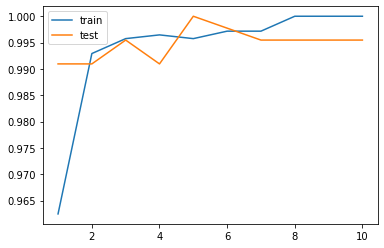

In [ ]:
plt.plot(range(1,epochs+1), history.history['accuracy'], label='train accuracy')
plt.plot(range(1,epochs+1), history.history['val_accuracy'], label='test accuracy')
plt.legend()

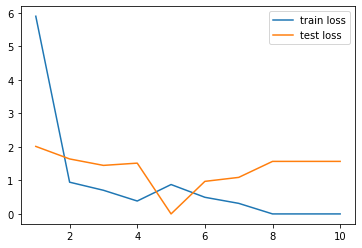

In [ ]:
plt.plot(range(1,epochs+1), history.history['loss'], label='train loss')
plt.plot(range(1,epochs+1), history.history['val_loss'], label='test loss')
plt.legend()

In [ ]:
model.save('/content/drive/MyDrive/Explicit_Image_Detection/my_model.h5') 

In [ ]:
My_model = tf.keras.models.load_model('/content/drive/MyDrive/Explicit_Image_Detection/my_model.h5')
My_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 204800)            0         
                                                                 
 dense (Dense)               (None, 1724)              353076924 
                                                                 
 dense_1 (Dense)             (None, 1)                 1725      
                                                                 
Total params: 353,078,649
Trainable params: 353,078,649
Non-trainable params: 0
_________________________________________________________________


# Detecting Explicit image

In [ ]:
path1 ='/content/drive/MyDrive/Explicit_Image_Detection/Test/normal.jfif'
X_test = extract_features1(
    path1
)


1/1 [==============================] - 0s 340ms/step


In [ ]:
y_pred = My_model.predict(X_test)
if(y_pred >= 0.5).all():
    print("Explicit Image")
else:
    print("Non Explicit Image")

Non Explicit Image
